In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st

In [5]:
data = pd.read_csv('operations.csv')

In [6]:
data.head()

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE


In [7]:
data.shape

(309, 5)

In [8]:
data.dtypes

date_operation     object
libelle            object
montant           float64
solde_avt_ope     float64
categ              object
dtype: object

In [9]:
data['date_operation'] = pd.to_datetime(data['date_operation'])

In [10]:
data.dtypes

date_operation    datetime64[ns]
libelle                   object
montant                  float64
solde_avt_ope            float64
categ                     object
dtype: object

In [11]:
data.head()

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE


In [12]:
data.isnull().sum()

date_operation    0
libelle           0
montant           2
solde_avt_ope     0
categ             1
dtype: int64

In [13]:
nb_na = data.isnull().sum()

In [14]:
nb_na[nb_na>0]

montant    2
categ      1
dtype: int64

In [15]:
data.loc[data['montant'].isnull(),:]

,date_operation,libelle,montant,solde_avt_ope,categ
107,2023-06-12,CARTE XX XX LES ANCIENS ROBINSON XX,NaN,4667.19,COURSES
269,2023-09-11,CARTE XX XX XX XX,NaN,3401.93,AUTRE


In [16]:
data.loc[data['categ'].isnull(),:]

,date_operation,libelle,montant,solde_avt_ope,categ
156,2023-07-06,PRELEVEMENT XX TELEPHONE XX XX,-36.48,3295.68,NaN


In [17]:
data.loc[data['libelle'] == 'PRELEVEMENT XX TELEPHONE XX XX', :]

,date_operation,libelle,montant,solde_avt_ope,categ
8,2023-04-05,PRELEVEMENT XX TELEPHONE XX XX,-7.02,2056.02,FACTURE TELEPHONE
62,2023-05-09,PRELEVEMENT XX TELEPHONE XX XX,-7.02,4090.10,FACTURE TELEPHONE
102,2023-06-07,PRELEVEMENT XX TELEPHONE XX XX,-6.38,4688.91,FACTURE TELEPHONE
156,2023-07-06,PRELEVEMENT XX TELEPHONE XX XX,-36.48,3295.68,NaN
204,2023-08-07,PRELEVEMENT XX TELEPHONE XX XX,-7.46,3751.73,FACTURE TELEPHONE
260,2023-09-05,PRELEVEMENT XX TELEPHONE XX XX,-6.38,3453.96,FACTURE TELEPHONE
308,2023-10-06,PRELEVEMENT XX TELEPHONE XX XX,-13.58,2413.58,FACTURE TELEPHONE


In [18]:
data.loc[data['categ'].isnull(), 'categ'] = 'FACTURE TELEPHONE'

In [19]:
data_na = data.loc[data['montant'].isnull(),:]

In [20]:
for index in data_na.index:
    data.loc[index, 'montant'] = data.loc[index+1, 'solde_avt_ope'] - data.loc[index,'solde_avt_ope']

In [21]:
data.loc[data['categ'].isnull(),:]

,date_operation,libelle,montant,solde_avt_ope,categ


In [22]:
data.isnull().sum()

date_operation    0
libelle           0
montant           0
solde_avt_ope     0
categ             0
dtype: int64

In [23]:
data.loc[data[['date_operation','libelle','montant','solde_avt_ope']].duplicated(keep = False),:]

,date_operation,libelle,montant,solde_avt_ope,categ
43,2023-04-25,CARTE XX XX LES ANCIENS ROBINSON XX,-32.67,3647.67,COURSES
44,2023-04-25,CARTE XX XX LES ANCIENS ROBINSON XX,-32.67,3647.67,COURSES


In [24]:
data.drop_duplicates(subset=['date_operation', 'libelle', 'montant', 'solde_avt_ope'],
inplace=True, ignore_index=True)

In [25]:
data.loc[data[['date_operation','libelle','montant','solde_avt_ope']].duplicated(keep = False),:]

,date_operation,libelle,montant,solde_avt_ope,categ


In [26]:
data.describe()

,montant,solde_avt_ope
count,308.000000,308.000000
mean,-45.782013,3395.301071
std,872.818105,667.109412
min,-15000.000000,1416.810000
25%,-20.447500,3010.737500
50%,-9.600000,3452.465000
75%,-2.715000,3787.232500
max,1071.600000,4709.310000


In [27]:
i = data.loc[data['montant']==-15000,:].index[0]

In [28]:
data.iloc[i-1:i+2,:]

,date_operation,libelle,montant,solde_avt_ope,categ
197,2023-08-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,3121.35,AUTRE
198,2023-08-03,CARTE XX XX XX XX,-15000.00,3797.35,AUTRE
199,2023-08-03,CARTE XX XX L'EPICERIE DEMBAS XX XX,-10.51,3782.96,AUTRE


In [29]:
data.loc[data['montant']==-15000, 'montant'] = -14.39

In [30]:
data.describe()

,montant,solde_avt_ope
count,308.000000,308.000000
mean,2.872565,3395.301071
std,176.089858,667.109412
min,-602.270000,1416.810000
25%,-20.047500,3010.737500
50%,-9.600000,3452.465000
75%,-2.715000,3787.232500
max,1071.600000,4709.310000


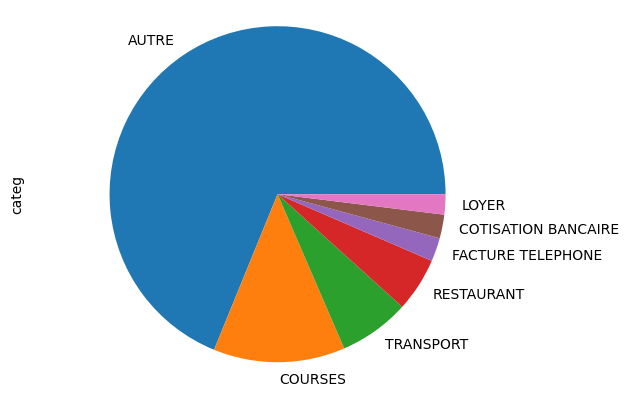

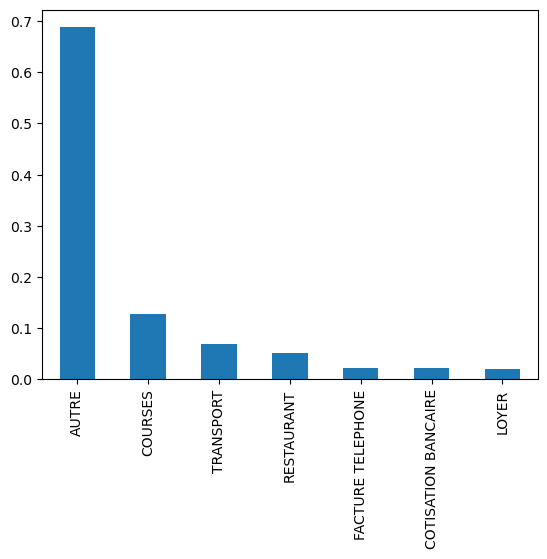

In [31]:
data['categ'].value_counts(normalize=True).plot(kind='pie')
plt.axis('equal')
plt.show()
data["categ"].value_counts(normalize=True).plot(kind='bar')
plt.show()

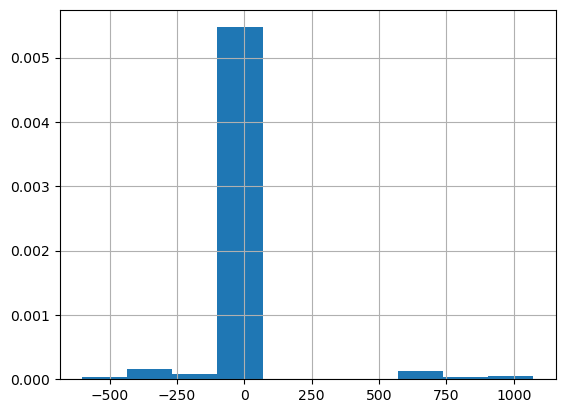

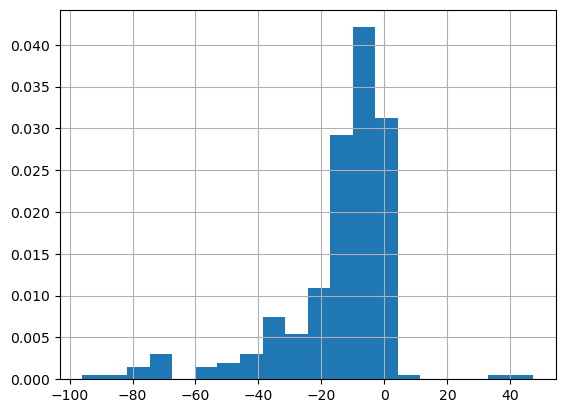

In [32]:
data['montant'].hist(density=True)
plt.show()

data[data.montant.abs() < 100]['montant'].hist(density=True,bins=20)
plt.show()

In [33]:
data['quart_mois'] = [int((jour-1)*4/31)+1 for jour in data["date_operation"].dt.day]

In [34]:
effectifs = data["quart_mois"].value_counts()
modalites = effectifs.index # l'index effectifs contien les modalités

tab = pd.DataFrame(modalites, columns = ['quart_mois'])
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(data)

In [35]:
effectifs = data["quart_mois"].value_counts()
modalites = effectifs.index # l'index effectifs contien les modalités

tab = pd.DataFrame(modalites, columns = ['quart_mois'])
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(data)
display(tab)

,quart_mois,n,f
0,1,86,0.279221
1,2,76,0.246753
2,3,75,0.243506
3,4,71,0.230519


In [36]:
tab = tab.sort_values("quart_mois")
tab["F"]=tab["f"].cumsum()
display(tab)

,quart_mois,n,f,F
0,1,86,0.279221,0.279221
1,2,76,0.246753,0.525974
2,3,75,0.243506,0.769481
3,4,71,0.230519,1.000000


In [37]:
data['montant'].mode()

0   -1.6
Name: montant, dtype: float64

In [38]:
data['montant'].mean()

2.8725649350649354

In [39]:
data['montant'].median()

-9.6

In [40]:
data['montant'].var()

31007.638040630973

In [41]:
data['montant'].var(ddof=2)

31108.97019109055

In [42]:
data['montant'].std()

176.08985785851203

In [43]:
data['montant'].std(ddof=2)/data['montant'].mean()

61.400649134998524

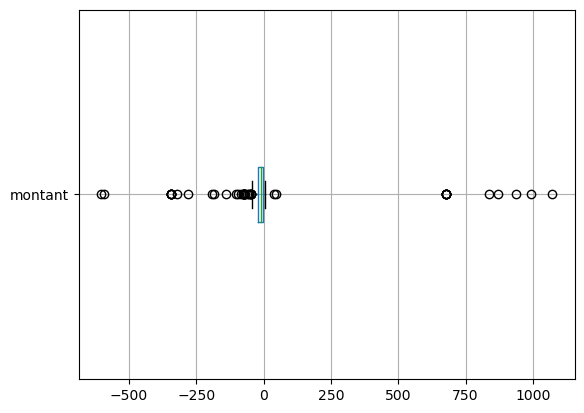

In [44]:
data.boxplot(column="montant",vert=False)
plt.show()

....................
AUTRE
moy:
 23.433207547169808
med:
 -8.31
mod:
 0   -1.6
Name: montant, dtype: float64
var:
 40786.60932580417
ect:
 201.95694918918778
cv:
 70.30544261121202


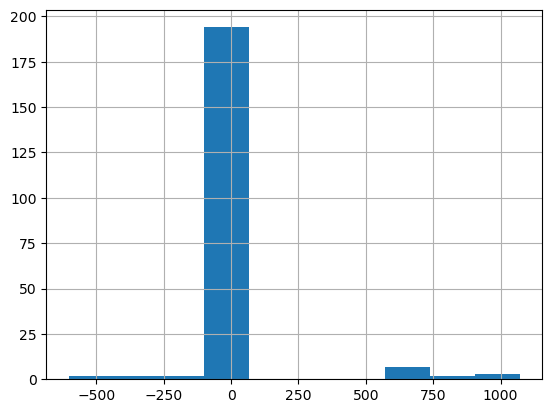

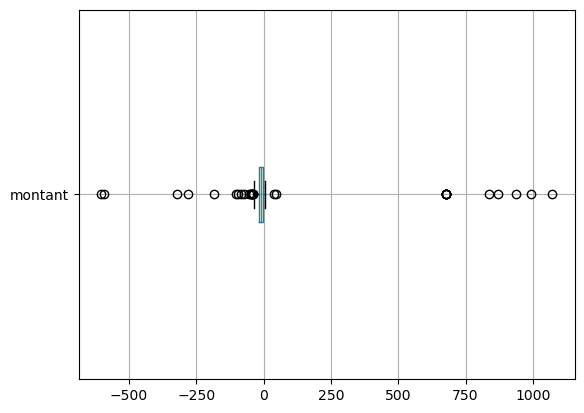

....................
TRANSPORT
moy:
 -52.99714285714286
med:
 -53.1
mod:
 0   -73.0
Name: montant, dtype: float64
var:
 2437.123906766918
ect:
 49.36723515416797
cv:
 17.185768214166412


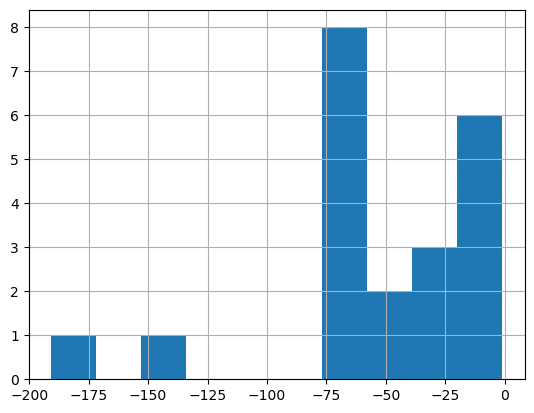

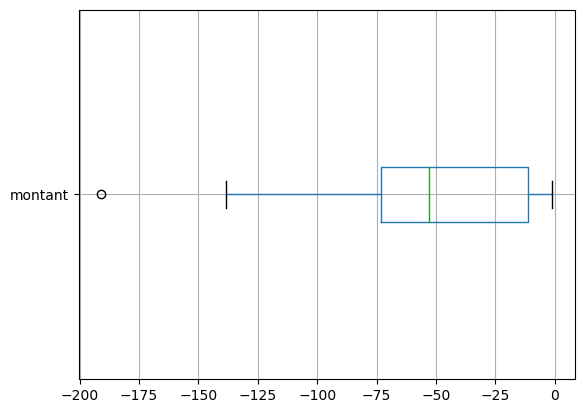

....................
FACTURE TELEPHONE
moy:
 -12.045714285714283
med:
 -7.02
mod:
 0   -7.02
1   -6.38
Name: montant, dtype: float64
var:
 147.02667428571425
ect:
 12.12545563208716
cv:
 4.221124989751732


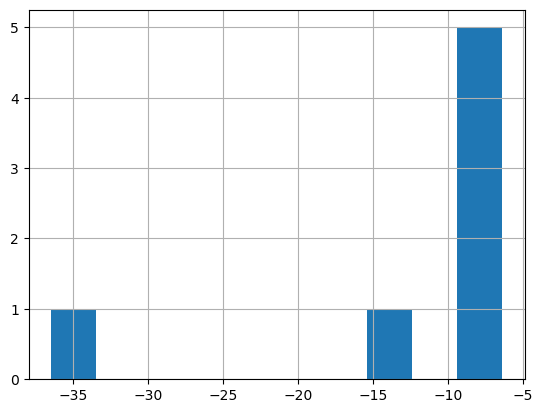

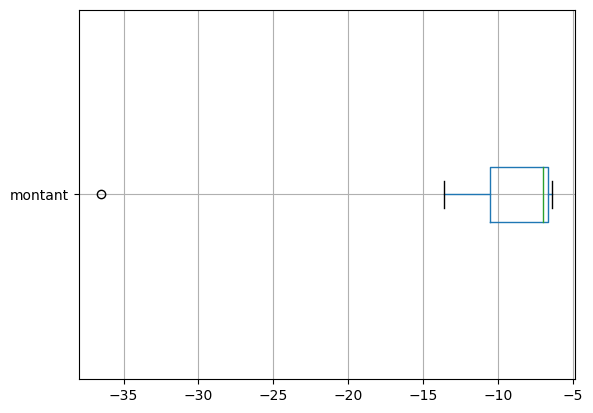

....................
COURSES
moy:
 -16.34128205128205
med:
 -12.24
mod:
 0    -60.16
1    -42.45
2    -42.42
3    -33.55
4    -32.67
5    -29.18
6    -28.11
7    -27.68
8    -26.58
9    -26.19
10   -23.43
11   -22.59
12   -21.73
13   -20.59
14   -18.45
15   -17.16
16   -13.59
17   -12.96
18   -12.49
19   -12.24
20   -10.91
21   -10.36
22    -9.88
23    -9.60
24    -9.31
25    -9.11
26    -6.89
27    -6.80
28    -6.60
29    -5.88
30    -4.63
31    -4.41
32    -4.39
33    -3.48
34    -2.93
35    -2.56
36    -2.51
37    -1.90
38    -0.94
Name: montant, dtype: float64
var:
 186.59429286209283
ect:
 13.659952154458406
cv:
 4.755315358658591


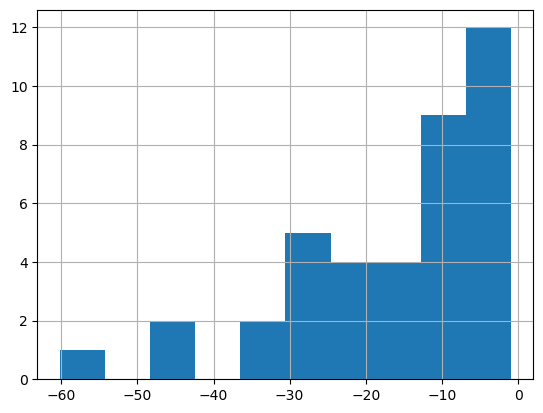

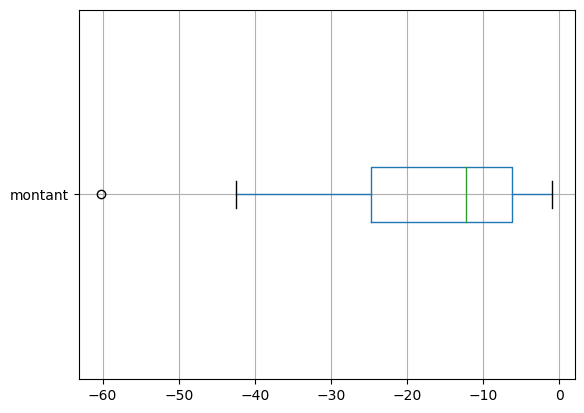

....................
COTISATION BANCAIRE
moy:
 -1.8857142857142857
med:
 -1.92
mod:
 0   -1.92
Name: montant, dtype: float64
var:
 0.0021942857142857063
ect:
 0.046843203501529505
cv:
 0.0163070999474101


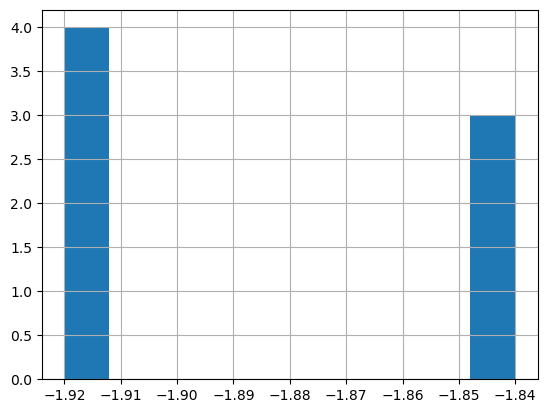

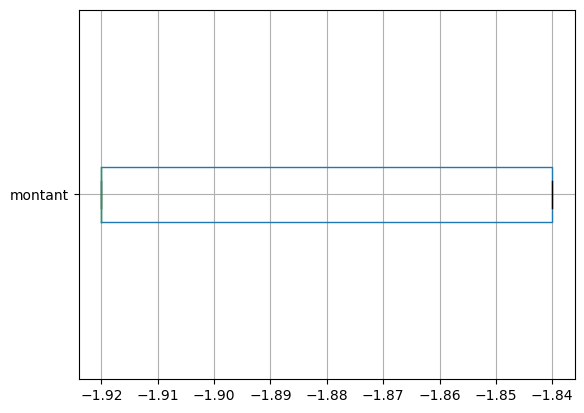

....................
RESTAURANT
moy:
 -10.3325
med:
 -10.1
mod:
 0   -9.2
Name: montant, dtype: float64
var:
 3.260792857142858
ect:
 1.805766556657548
cv:
 0.6286251477259392


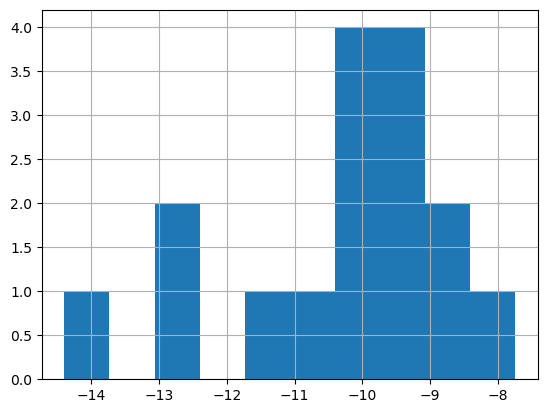

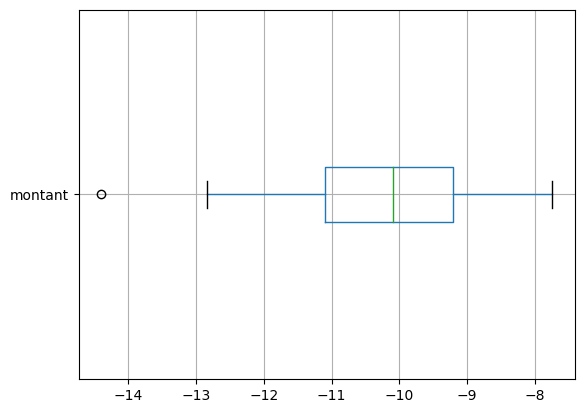

....................
LOYER
moy:
 -345.0
med:
 -345.0
mod:
 0   -345.0
Name: montant, dtype: float64
var:
 0.0
ect:
 0.0
cv:
 0.0


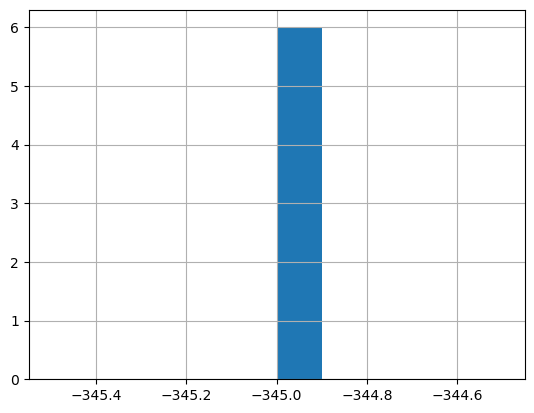

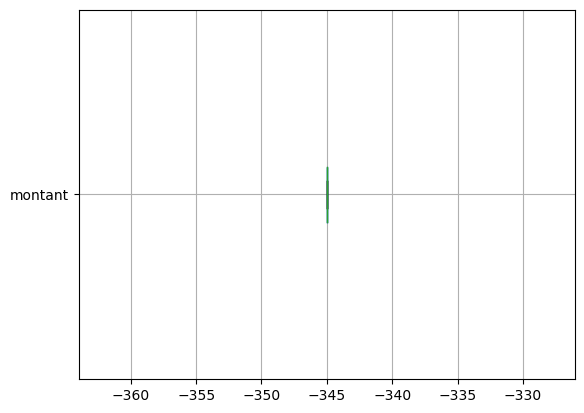

In [45]:
for cat in data["categ"].unique():
    subset=data[data.categ==cat]
    print("."*20)
    print(cat)
    print("moy:\n",subset['montant'].mean())
    print("med:\n",subset['montant'].median())
    print("mod:\n",subset['montant'].mode())
    print("var:\n",subset['montant'].var(ddof=2))
    print("ect:\n",subset['montant'].std(ddof=2))
    print("cv:\n",subset['montant'].std(ddof=2)/data['montant'].mean())
    subset["montant"].hist()
    plt.show()
    subset.boxplot(column="montant",vert=False)
    plt.show()

In [46]:
data['montant'].skew()

3.3618450105098843

In [47]:
data['montant'].kurtosis()

17.2719048282677

....................
AUTRE
moy:
 23.433207547169808
med:
 -8.31
mod:
 0   -1.6
Name: montant, dtype: float64
var:
 40786.60932580417
ect:
 201.95694918918778
cv:
 70.30544261121202
skew:_n 3.1215325222336423
kur:
 12.716537970826295


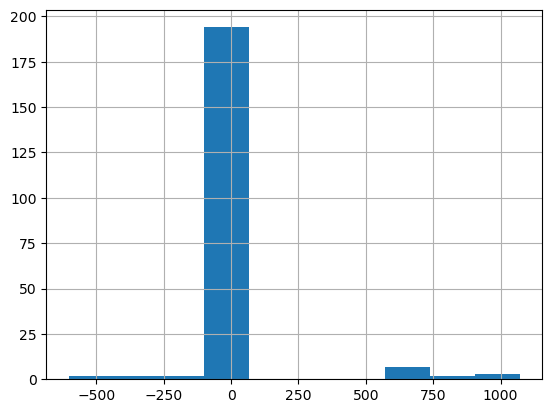

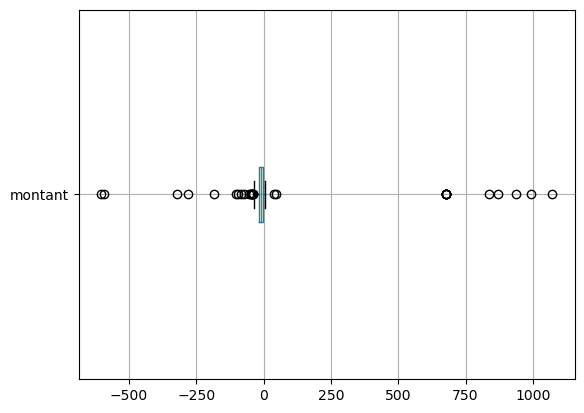

....................
TRANSPORT
moy:
 -52.99714285714286
med:
 -53.1
mod:
 0   -73.0
Name: montant, dtype: float64
var:
 2437.123906766918
ect:
 49.36723515416797
cv:
 17.185768214166412
skew:_n -1.248265076217821
kur:
 2.1922705326917495


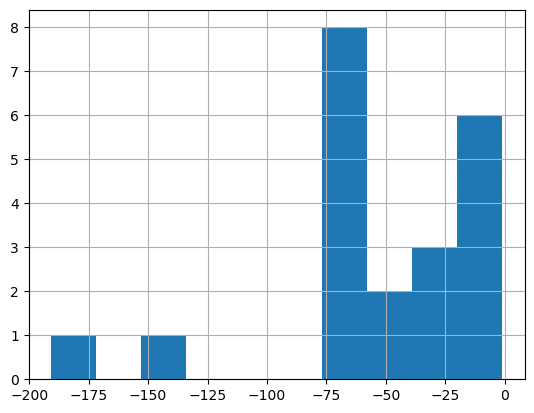

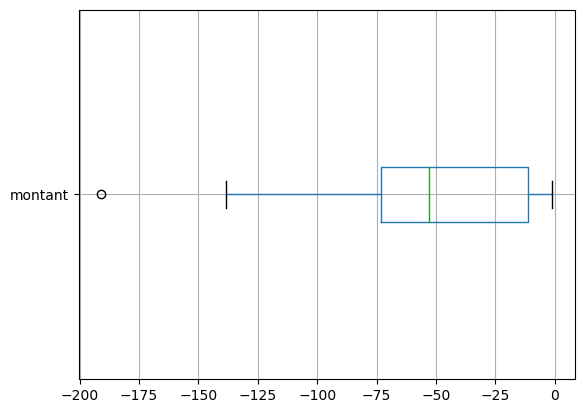

....................
FACTURE TELEPHONE
moy:
 -12.045714285714283
med:
 -7.02
mod:
 0   -7.02
1   -6.38
Name: montant, dtype: float64
var:
 147.02667428571425
ect:
 12.12545563208716
cv:
 4.221124989751732
skew:_n -2.3876514564281526
kur:
 5.798563367885492


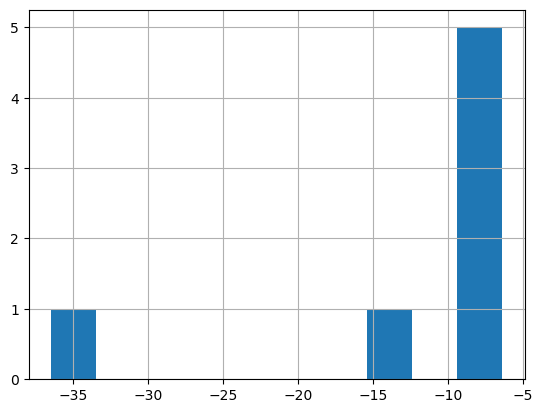

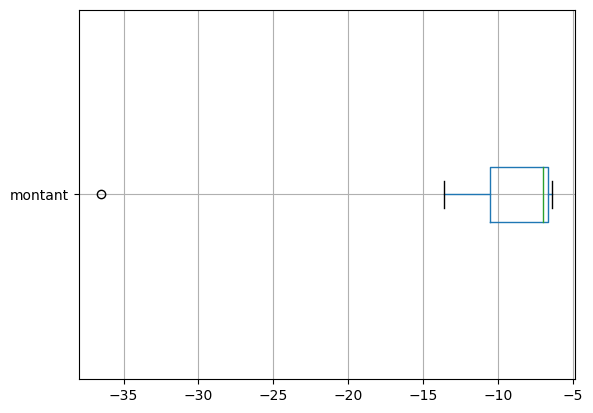

....................
COURSES
moy:
 -16.34128205128205
med:
 -12.24
mod:
 0    -60.16
1    -42.45
2    -42.42
3    -33.55
4    -32.67
5    -29.18
6    -28.11
7    -27.68
8    -26.58
9    -26.19
10   -23.43
11   -22.59
12   -21.73
13   -20.59
14   -18.45
15   -17.16
16   -13.59
17   -12.96
18   -12.49
19   -12.24
20   -10.91
21   -10.36
22    -9.88
23    -9.60
24    -9.31
25    -9.11
26    -6.89
27    -6.80
28    -6.60
29    -5.88
30    -4.63
31    -4.41
32    -4.39
33    -3.48
34    -2.93
35    -2.56
36    -2.51
37    -1.90
38    -0.94
Name: montant, dtype: float64
var:
 186.59429286209283
ect:
 13.659952154458406
cv:
 4.755315358658591
skew:_n -1.2467488306456982
kur:
 1.6047304940874998


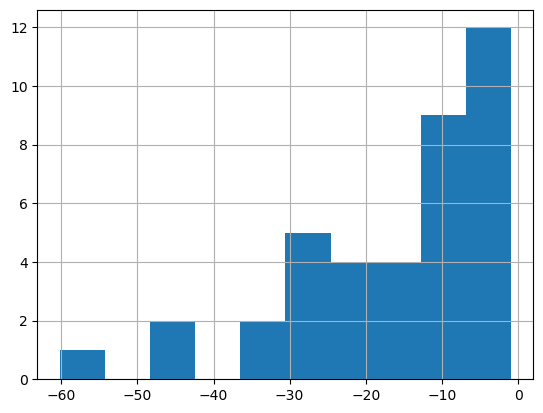

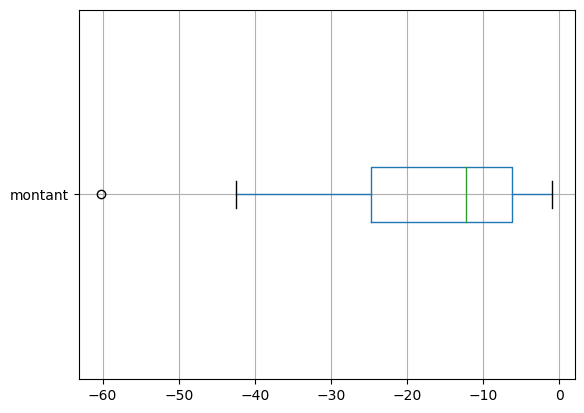

....................
COTISATION BANCAIRE
moy:
 -1.8857142857142857
med:
 -1.92
mod:
 0   -1.92
Name: montant, dtype: float64
var:
 0.0021942857142857063
ect:
 0.046843203501529505
cv:
 0.0163070999474101
skew:_n 0.37416573867739106
kur:
 -2.800000000000003


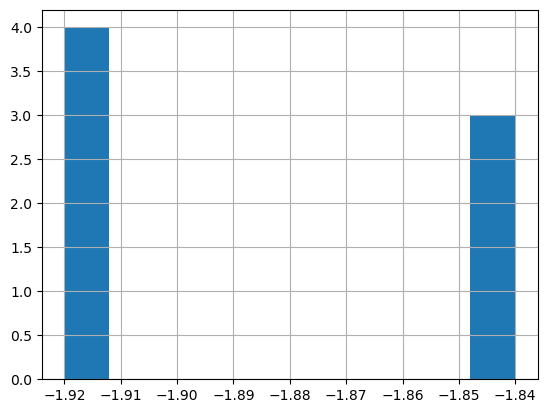

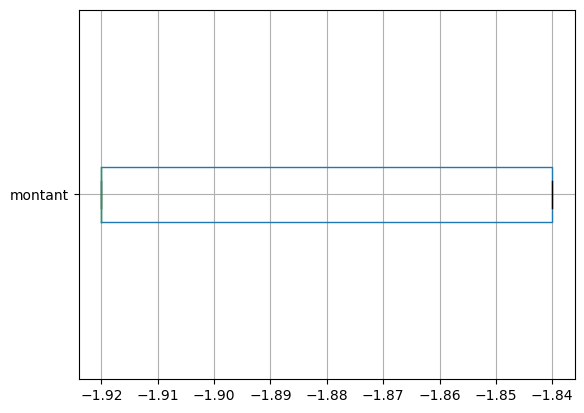

....................
RESTAURANT
moy:
 -10.3325
med:
 -10.1
mod:
 0   -9.2
Name: montant, dtype: float64
var:
 3.260792857142858
ect:
 1.805766556657548
cv:
 0.6286251477259392
skew:_n -0.8883503487158837
kur:
 0.5988855591691937


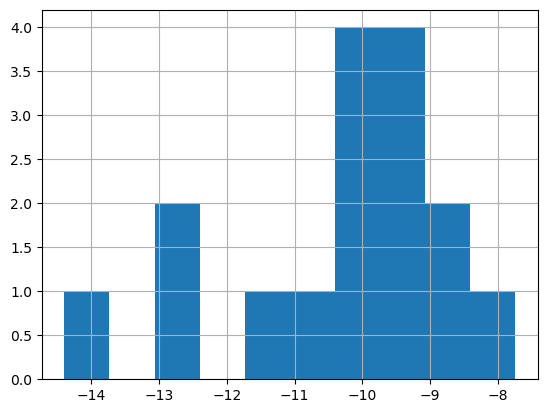

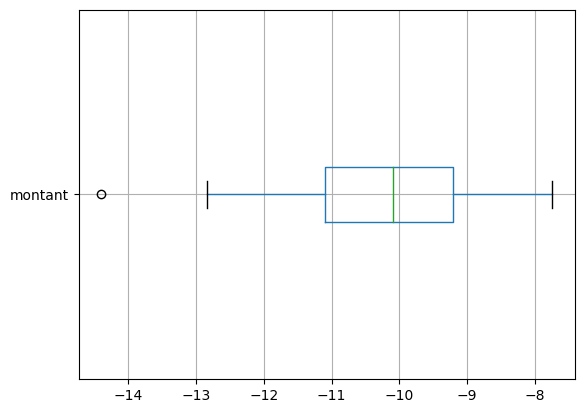

....................
LOYER
moy:
 -345.0
med:
 -345.0
mod:
 0   -345.0
Name: montant, dtype: float64
var:
 0.0
ect:
 0.0
cv:
 0.0
skew:_n 0
kur:
 0


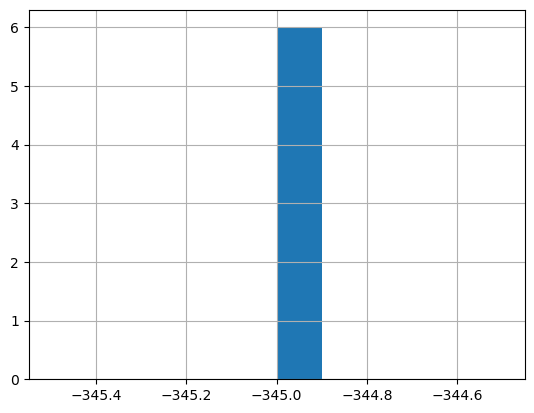

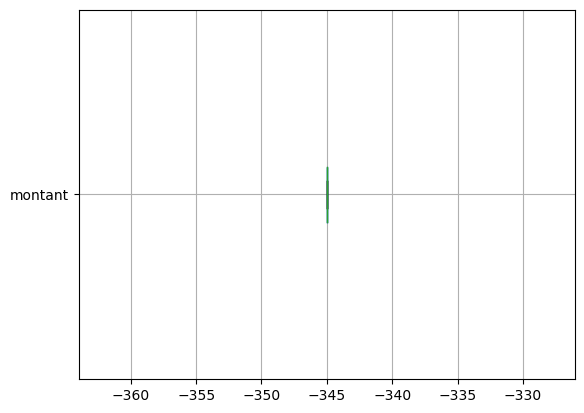

In [48]:
for cat in data["categ"].unique():
    subset=data[data.categ==cat]
    print("."*20)
    print(cat)
    print("moy:\n",subset['montant'].mean())
    print("med:\n",subset['montant'].median())
    print("mod:\n",subset['montant'].mode())
    print("var:\n",subset['montant'].var(ddof=2))
    print("ect:\n",subset['montant'].std(ddof=2))
    print("cv:\n",subset['montant'].std(ddof=2)/data['montant'].mean())
    print("skew:_n",subset['montant'].skew())
    print("kur:\n",subset['montant'].kurtosis())
    subset["montant"].hist()
    plt.show()
    subset.boxplot(column="montant",vert=False)
    plt.show()

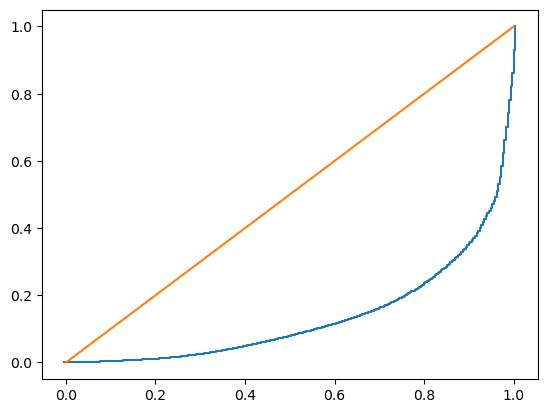

In [49]:
depenses = data[data['montant'] < 0]
dep = -depenses['montant'].values
n = len(dep)
lorenz = np.cumsum(np.sort(dep))/dep.sum()
lorenz = np.append([0],lorenz)   # la courbe de lorenz commence à 0
xaxis = np.linspace(0-1/n,1+1/n,len(lorenz)) # il y a un segment de taille n pour chaque individu 
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1],[0,1]) #tracer la bissectrice
plt.show()

In [50]:
AUC = (lorenz.sum() -lorenz[-1]/2-lorenz[0]/2)/n 
S = 0.5 - AUC
gini = 2*S
gini

0.7204386813739185

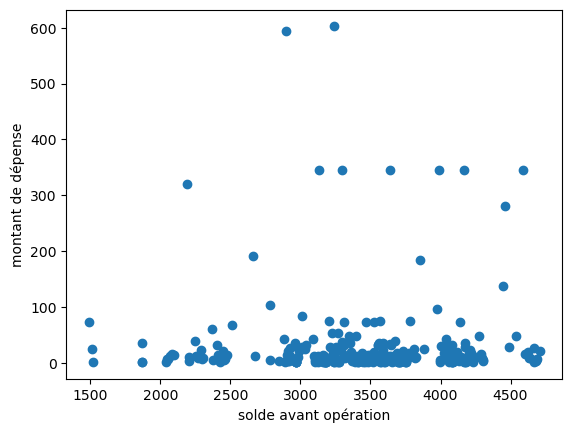

In [51]:
depenses = data[data['montant'] < 0]
plt.plot(depenses["solde_avt_ope"],-depenses["montant"],'o')
plt.xlabel("solde avant opération")
plt.ylabel("montant de dépense")
plt.show()

In [52]:
courses = data.loc[data.categ == "COURSES", :]
courses = courses.sort_values("date_operation")
courses["montant"] = -courses["montant"]
r=[]
last_date = dt.datetime.now()
for i,row in courses.iterrows():
    days = (row["date_operation"]-last_date).days
    if days == 0:
        r.append(r[-1])
    else:
        r.append(days)
    last_date = row["date_operation"]
courses["attente"] = r
courses = courses.iloc[1:,]
a = courses.groupby("date_operation")["montant"].sum()
b = courses.groupby("date_operation")["attente"].first()
couses = pd.DataFrame({"montant":a,"attente":b})

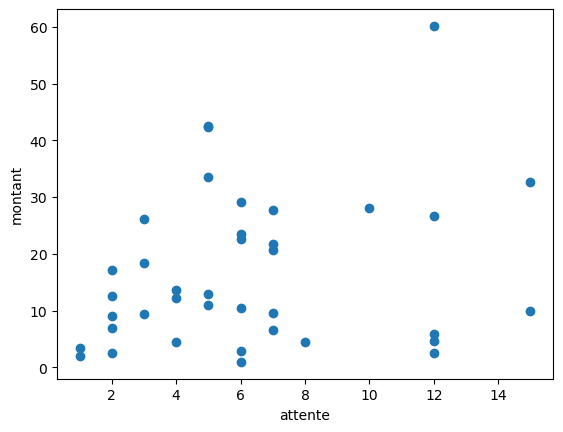

In [53]:
plt.plot(courses["attente"],courses["montant"],"o")
plt.xlabel("attente")
plt.ylabel("montant")
plt.show()

In [54]:
import statsmodels.api as sm
y = courses['montant']
x = courses[['attente']]
x = x.copy()
x['intercept'] = 1
result = sm.OLS(y,x).fit()
a,b = result.params['attente'],result.params['intercept']

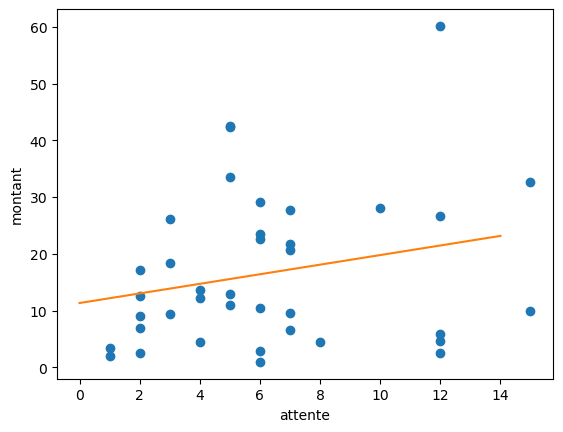

In [55]:
plt.plot(courses.attente,courses.montant,"o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel('attente')
plt.ylabel('montant')
plt.show()

attente       0.978607
intercept    10.705235
dtype: float64


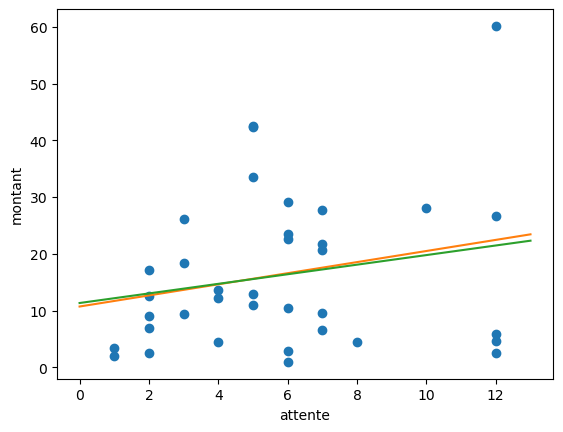

0.23551863611971247


In [58]:
courses = courses.loc[courses['attente']<14,:]
y = courses['montant']
x = courses[['attente']]
x = x.copy() # on modifiera x ,on en crée donc une copie 
x['intercept'] = 1
result = sm.OLS(y,x).fit() #ols = ordinary least square moindres carrés 
a_new,b_new = result.params['attente'],result.params['intercept']

print(result.params)

plt.plot(courses.attente,courses.montant,"o")
plt.plot(np.arange(14),[a_new*x+b_new for x in np.arange(14)])
plt.plot(np.arange(14),[a*x+b for x in np.arange(14)])
plt.xlabel('attente')
plt.ylabel('montant')
plt.show()
print(st.pearsonr(courses["montant"],courses["attente"])[0])

In [ ]:
print(st.pearsonr(depenses["solde_avt_ope"],-depenses["montant"])[0])
print(np.cov(depenses["solde_avt_ope"],-depenses["montant"],ddof=0)[1,0])


In [ ]:
x="categ"
y="montant"

sous_echantillon=data.loc[data["montant"]<0,:].copy()
sous_echantillon["montant"]=-sous_echantillon["montant"]
sous_echantillon = sous_echantillon.loc[sous_echantillon["categ"]!="LOYER",:]


In [ ]:
modalites = sous_echantillon[x].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echant
meanprops = {'marker':'o','markeredgecolor':'black',
             'markerfacecolor':'firebrick'}illon[x]==m][y])
medianprops = {'color':"black"}
plt.boxplot(groupes,labels=modalites,showfliers=False , medianprops=medianprops,vert=False,patch_artist=True,showmeans=True,meanprops=meanprops)
plt.show()

In [57]:
x="categ"
y="montant"
def eta_squared(x,y):
    moyenne_y=y.mean()
    classes=[]
    for classe in x.unique():
        yi_classe=y[x==classe]
        classes.append({'ni':len(yi_classe),'moyenne_classe':yi_classe.mean()})
    SCT=sum([(yj-moyenne_y)**2 for yj in y ])    
    SCE=sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
eta_squared(sous_echantillon[x],sous_echantillon[y])

0.0275228003018415

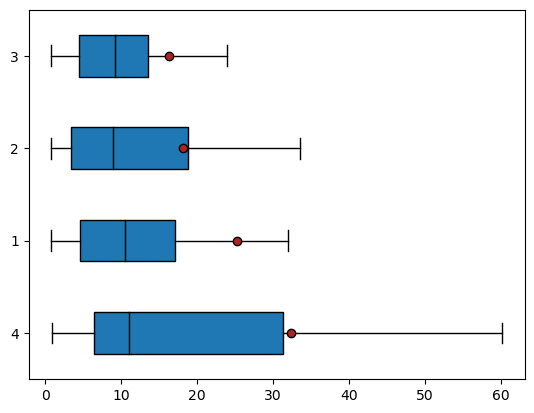

0.011398038009310869

In [58]:
x='quart_mois'
y='montant'
modalites=sous_echantillon[x].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[x]==m][y])
medianprops = {'color':"black"}
meanprops = {'marker':'o','markeredgecolor':'black',
             'markerfacecolor':'firebrick'}
plt.boxplot(groupes,labels=modalites,showfliers=False , medianprops=medianprops,vert=False,patch_artist=True,showmeans=True,meanprops=meanprops)
plt.show()
eta_squared(sous_echantillon[x],sous_echantillon[y])

In [59]:
x='quart_mois'
y='categ'
cont = data[[x,y]].pivot_table(index=x,columns=y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,AUTRE,COTISATION BANCAIRE,COURSES,FACTURE TELEPHONE,LOYER,RESTAURANT,TRANSPORT,Total
quart_mois,,,,,,,,
1,55.0,7.0,6.0,6.0,NaN,3.0,9.0,86
2,45.0,NaN,11.0,1.0,6.0,7.0,6.0,76
3,60.0,NaN,7.0,NaN,NaN,4.0,4.0,75
4,52.0,NaN,15.0,NaN,NaN,2.0,2.0,71
Total,212.0,7.0,39.0,7.0,6.0,16.0,21.0,308


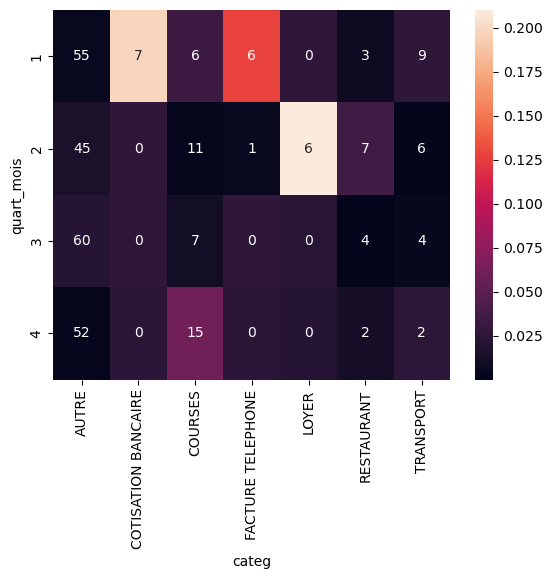

In [60]:
import seaborn as sns
tx= cont.loc[:,["Total"]]
ty= cont.loc[["Total"],:]
n=len(data)
indep=tx.dot(ty)/ n
c= cont.fillna(0)
measure = (c-indep)**2/indep
xi_n=measure.sum().sum()
table=measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()